In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = pd.Series([1, 3, 5, "需", "han", "问"])
print(s)

rq = pd.Series({"姓名": "Xuanwen", "性别": "男", "年龄": 21, "颜值": "帅气"})
print(rq)

0      1
1      3
2      5
3      需
4    han
5      问
dtype: object
姓名    Xuanwen
性别          男
年龄         21
颜值         帅气
dtype: object


### 1、创建DataFrame

In [3]:
df = pd.DataFrame(np.random.randn(6, 4), columns=["a", "b", "c", "d"], index=s)
print(df)
print("*"*15)
df_1 = pd.DataFrame({"姓名": ["Xuanwen", "Coin", "xuan"], "性别": ["男", "女", "nan"], "年龄": [
                    21, 22, 24], "颜值": ["帅气", "美丽", "可爱"]}, index=["布布", "一二", "huihui"])
print(df_1)
print("*"*15)
print(df_1.dtypes)  # 返回每一列的类型
print("*"*15)
print(df_1.index)  # 返回行索引
print("*"*15)
print(df_1.columns)  # 返回列索引
print("*"*15)
print(df_1.values)
print("*"*15)
print(df_1.describe())  # 能对数字列进行统计计算.mean是均值,std是标准差
print("*"*15)
print(df_1.T)  # 类似于矩阵一样,进行转置

            a         b         c         d
1   -1.238121 -0.416067  0.287215 -0.346222
3    0.863105  0.905776  1.025829  0.159715
5    0.139265 -0.890743 -0.735500 -1.377552
需    0.363571 -0.316017 -0.248284 -0.115431
han -0.379174  2.008942  0.093906 -0.682615
问   -1.361049  1.123688 -1.570600  0.004381
***************
             姓名   性别  年龄  颜值
布布      Xuanwen    男  21  帅气
一二         Coin    女  22  美丽
huihui     xuan  nan  24  可爱
***************
姓名    object
性别    object
年龄     int64
颜值    object
dtype: object
***************
Index(['布布', '一二', 'huihui'], dtype='object')
***************
Index(['姓名', '性别', '年龄', '颜值'], dtype='object')
***************
[['Xuanwen' '男' 21 '帅气']
 ['Coin' '女' 22 '美丽']
 ['xuan' 'nan' 24 '可爱']]
***************
              年龄
count   3.000000
mean   22.333333
std     1.527525
min    21.000000
25%    21.500000
50%    22.000000
75%    23.000000
max    24.000000
***************
         布布    一二 huihui
姓名  Xuanwen  Coin   xuan
性别        男     女    nan
年龄  

In [4]:
df_1 = pd.DataFrame(
    {
        "姓名": ["Xuanwen", "Coin", "猪猪"],
        "性别": ["男", "女", "男"],
        "年龄": [21, 22, 22],
        "颜值": ["帅气", "美丽", "美丽"],
    },
    index=[0, 1, 2],
)
# 按索引排序
# ascending=True从小到大,ascending=False从大到小
print(df_1.sort_index(axis=0, ascending=False))
# df_2 = df_1.sort_index(axis=0, ascending=False)
# print(df_2)
# 按值排序
print(df_1.sort_values("颜值"))

        姓名 性别  年龄  颜值
2       猪猪  男  22  美丽
1     Coin  女  22  美丽
0  Xuanwen  男  21  帅气
        姓名 性别  年龄  颜值
0  Xuanwen  男  21  帅气
1     Coin  女  22  美丽
2       猪猪  男  22  美丽


### 2、索引

In [5]:
dates = pd.date_range("20250325", periods=6)
# print(dates)
df = pd.DataFrame(np.arange(24).reshape(6, 4),
                  index=dates,
                  columns=["A", "B", "C", "D"])
print(df)
print("*" * 15)
# loc:按行,列标签值查询
print(df.loc[df.index[[0,2,3]], "A"])
# 在pandas中，当需要从索引（或数组）中选取多个元素时，必须通过列表来传递这些位置,而不能直接写 0,2,3（这会被视为多个参数，导致语法错误）
# 一维索引对象的取值操作只接受一个参数（单个整数或一个列表），不能同时传入多个逗号分隔的整数。
print("*" * 15)
print(df.loc[["20250327", "20250330"], ["A", "C"]])
print("*" * 15)
# iloc:按行,列数字位置查询
print(df.iloc[[1, 3], [1, 2]])
print("*" * 15)
# 布尔索引
print(df.loc[:, "A"] > 8)
print("*" * 15)
print(df.loc[df.loc[:, "A"] > 8, "A"])

             A   B   C   D
2025-03-25   0   1   2   3
2025-03-26   4   5   6   7
2025-03-27   8   9  10  11
2025-03-28  12  13  14  15
2025-03-29  16  17  18  19
2025-03-30  20  21  22  23
***************
2025-03-25     0
2025-03-27     8
2025-03-28    12
Name: A, dtype: int32
***************
             A   C
2025-03-27   8  10
2025-03-30  20  22
***************
             B   C
2025-03-26   5   6
2025-03-28  13  14
***************
2025-03-25    False
2025-03-26    False
2025-03-27    False
2025-03-28     True
2025-03-29     True
2025-03-30     True
Freq: D, Name: A, dtype: bool
***************
2025-03-28    12
2025-03-29    16
2025-03-30    20
Freq: D, Name: A, dtype: int32


### 3、设置值

In [18]:
dates = pd.date_range("20250325", periods=6)
df = pd.DataFrame(np.arange(24).reshape(6, 4), index=dates,
                  columns=["A", "B", "C", "D"])
print(df)
print("*"*15)
# 修改值
df.iloc[2, 2] = 520
print(df)
print("*"*15)
df.loc["20250325", "D"] = 520
print(df)
print("*"*15)
# 判断后修改值
df.loc[df.loc[:, "B"] > 10, "B"] = 520
print(df)
print("*"*15)
# 添加新的一列(空白列或者已经定义好值的列)
df.loc[:, "E"] = np.nan
print(df)
print("*"*15)
df.loc[:, "F"] = pd.Series([i for i in range(6)], index=dates)
# df.loc[:,"F"]=pd.Series(np.arange(6),index=dates)
df.loc[:, "G"] = [0, 1, 2, 3, 4, 5]
print(df)

             A   B   C   D
2025-03-25   0   1   2   3
2025-03-26   4   5   6   7
2025-03-27   8   9  10  11
2025-03-28  12  13  14  15
2025-03-29  16  17  18  19
2025-03-30  20  21  22  23
***************
             A   B    C   D
2025-03-25   0   1    2   3
2025-03-26   4   5    6   7
2025-03-27   8   9  520  11
2025-03-28  12  13   14  15
2025-03-29  16  17   18  19
2025-03-30  20  21   22  23
***************
             A   B    C    D
2025-03-25   0   1    2  520
2025-03-26   4   5    6    7
2025-03-27   8   9  520   11
2025-03-28  12  13   14   15
2025-03-29  16  17   18   19
2025-03-30  20  21   22   23
***************
             A    B    C    D
2025-03-25   0    1    2  520
2025-03-26   4    5    6    7
2025-03-27   8    9  520   11
2025-03-28  12  520   14   15
2025-03-29  16  520   18   19
2025-03-30  20  520   22   23
***************
             A    B    C    D   E
2025-03-25   0    1    2  520 NaN
2025-03-26   4    5    6    7 NaN
2025-03-27   8    9  520   11 NaN
20

### 4、处理丢失数据

In [34]:
dates = pd.date_range("20250325", periods=6)
df = pd.DataFrame(
    np.arange(24).reshape(6, 4), index=dates, columns=["A", "B", "C", "D"]
)
df.loc[:, "E"] = np.nan
df.loc["20250331", :] = np.nan
print(df)
print("*" * 15)
df.iloc[0, 1] = np.nan
df.iloc[1, 2] = np.nan
print(df)
print("*" * 15)
# dropna:(how=any,出现一个nan就删去;how=all,全部都是nan才会删去)返回一个新的DataFrame
df_1 = df.dropna(axis=0, how="all")
print(df_1)
print("*" * 15)
df_2 = df_1.dropna(axis=1, how="any")
print(df_2)
print("*" * 15)
# fillna:(value=在nan的地方填入的值)返回一个新的DataFrame
df_3 = df.fillna(value="猪猪")
print(df_3)
print("*" * 15)
# isnull:查看为空的，空的返回True
print(df.isnull())
print("*" * 15)
# np.any:测试数组中如果有一个True,就返回True
print(np.any(df.isnull()))

               A     B     C     D   E
2025-03-25   0.0   1.0   2.0   3.0 NaN
2025-03-26   4.0   5.0   6.0   7.0 NaN
2025-03-27   8.0   9.0  10.0  11.0 NaN
2025-03-28  12.0  13.0  14.0  15.0 NaN
2025-03-29  16.0  17.0  18.0  19.0 NaN
2025-03-30  20.0  21.0  22.0  23.0 NaN
2025-03-31   NaN   NaN   NaN   NaN NaN
***************
               A     B     C     D   E
2025-03-25   0.0   NaN   2.0   3.0 NaN
2025-03-26   4.0   5.0   NaN   7.0 NaN
2025-03-27   8.0   9.0  10.0  11.0 NaN
2025-03-28  12.0  13.0  14.0  15.0 NaN
2025-03-29  16.0  17.0  18.0  19.0 NaN
2025-03-30  20.0  21.0  22.0  23.0 NaN
2025-03-31   NaN   NaN   NaN   NaN NaN
***************
               A     B     C     D   E
2025-03-25   0.0   NaN   2.0   3.0 NaN
2025-03-26   4.0   5.0   NaN   7.0 NaN
2025-03-27   8.0   9.0  10.0  11.0 NaN
2025-03-28  12.0  13.0  14.0  15.0 NaN
2025-03-29  16.0  17.0  18.0  19.0 NaN
2025-03-30  20.0  21.0  22.0  23.0 NaN
***************
               A     D
2025-03-25   0.0   3.0
2025-03-2

### 5、合并(concat)

In [117]:
# concat:对多个Series或DataFrame进行合并;沿着行或列方向进行合并;支持多种连接方式
# concat(axis:控制合并的方向;ignore_index=True:忽视各DataFrame原有索引号)
df1 = pd.DataFrame(np.full((3, 4), 0), columns=["a", "b", "c", "d"])
df2 = pd.DataFrame(np.full((3, 4), 1), columns=["a", "b", "c", "d"])
df3 = pd.DataFrame(np.full((3, 4), 2), columns=["a", "b", "c", "d"])
rq = pd.concat((df1, df2, df3), axis=0, ignore_index=True)
print(rq)
print("*" * 15)
# concat中的join参数,默认="outer"
# 上下合并(join="inner":合并列名相同的列;join="outer":全部都合并,列名不相同的部分为NAN)
df1 = pd.DataFrame(np.full((3, 4), 0), columns=[
                   "a", "b", "c", "d"], index=[1, 2, 3])
df2 = pd.DataFrame(np.full((3, 4), 1), columns=[
                   "b", "c", "d", "e"], index=[2, 3, 4])
rq = pd.concat((df1, df2), join="outer", ignore_index=True)
print(rq)
print("*" * 15)
# 左右合并(join="inner":合并行号相同的行;join="outer":全部都合并,行号不相同的部分为NAN)
df1 = pd.DataFrame(np.full((3, 4), 0), columns=[
                   "a", "b", "c", "d"], index=[1, 2, 3])
df2 = pd.DataFrame(np.full((3, 4), 1), columns=[
                   "b", "c", "d", "e"], index=[2, 3, 4])
rq = pd.concat((df2, df1), axis=1).iloc[[0,1,2]]
print(rq)
print("*" * 15)
# _append:仅能按行合并，无法按列合并(已经被淘汰了，建议用concat方法）
df1 = pd.DataFrame(np.full((3, 4), 0), columns=["a", "b", "c", "d"])
df2 = pd.DataFrame(np.full((3, 4), 1), columns=["a", "b", "c", "d"])
df3 = pd.Series(np.arange(1, 5), index=["a", "b", "c", "d"])
rq = df1._append(df2)
ret = df1._append(df3, ignore_index=True)
print(rq)
print("*" * 15)
print(ret)

   a  b  c  d
0  0  0  0  0
1  0  0  0  0
2  0  0  0  0
3  1  1  1  1
4  1  1  1  1
5  1  1  1  1
6  2  2  2  2
7  2  2  2  2
8  2  2  2  2
***************
     a  b  c  d    e
0  0.0  0  0  0  NaN
1  0.0  0  0  0  NaN
2  0.0  0  0  0  NaN
3  NaN  1  1  1  1.0
4  NaN  1  1  1  1.0
5  NaN  1  1  1  1.0
***************
     b    c    d    e    a    b    c    d
2  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0
4  1.0  1.0  1.0  1.0  NaN  NaN  NaN  NaN
***************
   a  b  c  d
0  0  0  0  0
1  0  0  0  0
2  0  0  0  0
0  1  1  1  1
1  1  1  1  1
2  1  1  1  1
***************
   a  b  c  d
0  0  0  0  0
1  0  0  0  0
2  0  0  0  0
3  1  2  3  4


### 6、合并(merge)

In [97]:
# 相同的key
left = pd.DataFrame({"key": ["k0", "k1", "k2"], "A": [
                    "a0", "a1", "a2"], "B": ["b0", "b1", "b2"]})
right = pd.DataFrame({"key": ["k0", "k1", "k2"], "B": [
                     "b0", "b1", "b2"], "C": ["c0", "c1", "c2"]})
result = pd.merge(left, right, on=["key"])
print(result)

  key   A B_x B_y   C
0  k0  a0  b0  b0  c0
1  k1  a1  b1  b1  c1
2  k2  a2  b2  b2  c2


In [114]:
# 两个不同的Key
# how默认为'inner'
# inner:只考虑相同的key;outer全部都联接起来,没有的就用nan;left&right:基于left和right的Key填充,没有的话就是nan
# indicator=True:多处一列来显示数据来源
left = pd.DataFrame({"key1": ["k0", "k0", "k1"], "key2": ["k0", "k1", "k0"], "A": [
                    "a0", "a1", "a2"], "B": ["b0", "b1", "b2"]})
right = pd.DataFrame({"key1": ["k0", "k1", "k1"], "key2": ["k0", "k0", "k0"], "D": [
                     "d0", "d1", "d2"], "C": ["c0", "c1", "c2"]})
result = pd.merge(
    left, right, on=["key1", "key2"], how="outer", indicator=True)
print(result)

  key1 key2   A   B    D    C     _merge
0   k0   k0  a0  b0   d0   c0       both
1   k0   k1  a1  b1  NaN  NaN  left_only
2   k1   k0  a2  b2   d1   c1       both
3   k1   k0  a2  b2   d2   c2       both


In [21]:
# suffixes:可以区分合并后的同名列
boy = pd.DataFrame({"k": ["k0", "k1", "k2"], "age": [1, 2, 3]})
girl = pd.DataFrame({"k": ["k0", "k0", "k3"], "age": [4, 5, 6]})
result = pd.merge(boy, girl, on="k", how="left", suffixes=["_boys", "_girls"])
print(result)

    k  age_boys  age_girls
0  k0         1        4.0
1  k0         1        5.0
2  k1         2        NaN
3  k2         3        NaN


### 7、画图

          a         b         c         d
0  1.764052  0.400157  0.978738  2.240893
1  1.867558 -0.977278  0.950088 -0.151357
2 -0.103219  0.410599  0.144044  1.454274
3  0.761038  0.121675  0.443863  0.333674
4  1.494079 -0.205158  0.313068 -0.854096
             a         b          c          d
0     1.764052  0.400157   0.978738   2.240893
1     3.631610 -0.577121   1.928826   2.089536
2     3.528391 -0.166522   2.072870   3.543809
3     4.289429 -0.044847   2.516733   3.877484
4     5.783508 -0.250005   2.829801   3.023388
..         ...       ...        ...        ...
995 -66.863909 -1.347448 -26.457709  -9.217353
996 -64.917859 -0.371066 -26.280551 -10.240526
997 -64.811139 -1.282947 -27.748918  -9.664047
998 -64.745833 -2.056460 -27.353970 -10.167937
999 -62.966274 -2.087032 -25.776882 -10.980739

[1000 rows x 4 columns]


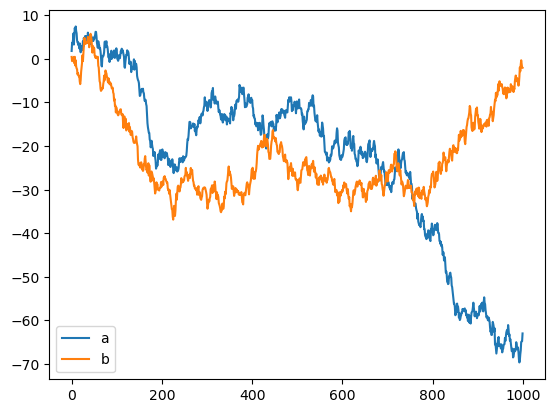

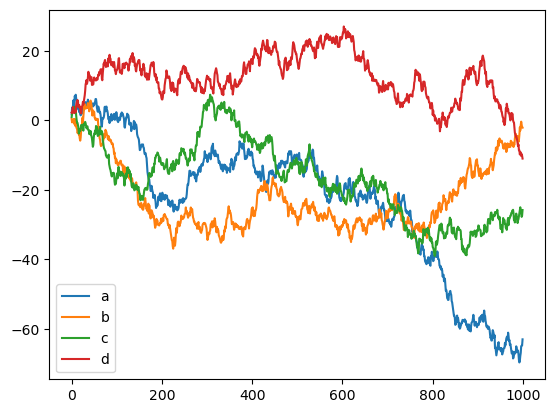

In [2]:
np.random.seed(0)
data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(
    1000), columns=["a", "b", "c", "d"])
data1 = data.cumsum()
print(data.head())
print(data1)
data1.loc[:, ["a", "b"]].plot()
# plt.plot(data1)
data1.plot()
plt.show()

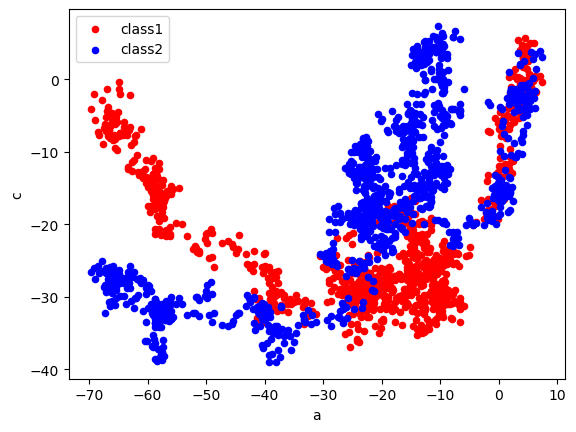

In [28]:
np.random.seed(0)
data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(
    1000), columns=["a", "b", "c", "d"])
data1 = data.cumsum()
# ax是一个matplotlib的坐标轴对象，它代表了图形中的一个绘图区域.
# 调用data1.plot.scatter()时,Pandas会默认创建一个新的图形和坐标轴对象来绘制这个散点图,并且将这个坐标轴对象返回并赋值给ax.
# 调用第二个data1.plot.scatter()时,通过指定ax = ax,会让Pandas使用之前已经创建好的ax坐标轴对象来绘制第二个散点图.
ax = data1.plot.scatter(x="a", y="b", color="r", label="class1")
data1.plot.scatter(x="a", y="c", color="b", label="class2", ax=ax)
plt.show()